# Análise de Dados — Teste Técnico
Este projeto foi desenvolvido como parte do processo seletivo para o programa de trainee da Triggo.ai. O objetivo é realizar uma análise exploratória e descritiva dos dados, respondendo a questões de negócio.

Além da etapa exploratória, serão implementados dois modelos de Machine Learning:
* Predição de Atraso na Entrega: modelo supervisionado de classificação para prever se um pedido será entregue com atraso.
* Segmentação de Clientes: modelo de clusterização para identificar grupos de clientes com comportamentos semelhantes e propor estratégias específicas para cada segmento.

O projeto está estruturado nas seguintes etapas:
* Preparação dos Dados
* Análise Exploratória
* Resolução de Problemas de Negócio
* Modelagem Preditiva e de Clusterização
* Visualizações e Dashboards

In [2]:
# importação das bibliotecas necessárias à primeira etapa do projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importando os dados
import os
pasta = './data'

for arquivo in os.listdir(pasta):
    if arquivo.endswith('.csv'):
        nome_var = arquivo.replace('.csv', '').lower().replace(' ', '_')
        caminho = os.path.join(pasta, arquivo)
        globals()[nome_var] = pd.read_csv(caminho)

# Vamos listar os nomes das variáveis criadas:
vars_criadas = [arquivo.replace('.csv', '').lower().replace(' ', '_') for arquivo in os.listdir(pasta) if arquivo.endswith('.csv')]
print("Variáveis criadas:")
for var in vars_criadas:
    print(f"- {var}")

Variáveis criadas:
- olist_customers_dataset
- olist_geolocation_dataset
- olist_orders_dataset
- olist_order_items_dataset
- olist_order_payments_dataset
- olist_order_reviews_dataset
- olist_products_dataset
- olist_sellers_dataset
- product_category_name_translation


In [6]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
olist_geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [12]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
olist_order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [16]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [18]:
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [20]:
olist_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [22]:
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [24]:
#checar por valores nulos
product_category_name_translation.info()
olist_products_dataset.info()
olist_customers_dataset.info()
olist_geolocation_dataset.info()
olist_orders_dataset.info()
olist_order_items_dataset.info()
olist_order_payments_dataset.info()
olist_order_reviews_dataset.info()
olist_sellers_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 

Temos valores nulos para as tabelas:
* olist_products_dataset
* olist_orders_dataset
* olist_order_reviews_dataset

Podemos apagar as linhas com valores nulos para prosseguir com a nossa análise.

In [27]:
# Para o DataFrame olist_products_dataset
olist_products_dataset = olist_products_dataset.dropna()

# Para o DataFrame olist_orders_dataset
olist_orders_dataset = olist_orders_dataset.dropna()

# Para o DataFrame olist_order_reviews_dataset
olist_order_reviews_dataset = olist_order_reviews_dataset.dropna()

In [29]:
#checando as tabelas limpas
olist_products_dataset.info()
olist_orders_dataset.info()
olist_order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32340 non-null  object 
 1   product_category_name       32340 non-null  object 
 2   product_name_lenght         32340 non-null  float64
 3   product_description_lenght  32340 non-null  float64
 4   product_photos_qty          32340 non-null  float64
 5   product_weight_g            32340 non-null  float64
 6   product_length_cm           32340 non-null  float64
 7   product_height_cm           32340 non-null  float64
 8   product_width_cm            32340 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----

## Modelo Relacional
- `olist_orders_dataset` → `olist_order_items_dataset` : via `order_id`
- `olist_order_items_dataset` → `olist_products_dataset` : via `product_id`
- `olist_products_dataset` → `product_category_name_translation` : via `product_category_name`
- `olist_orders_dataset` → `olist_order_reviews_dataset` : via `order_id`
- `olist_orders_dataset` → `olist_order_payments_dataset` : via `order_id`
- `olist_orders_dataset` → `olist_customers_dataset` : via `customer_id`
- `olist_customers_dataset` → `olist_geolocation_dataset` : via `customer_zip_code_prefix` (não é relação 1 pra 1, mas dá pra cruzar)

In [32]:
# Começando pela orders, que é a tabela central
df_main = olist_orders_dataset.copy()

# Juntando com os customers
df_main = df_main.merge(olist_customers_dataset, on='customer_id', how='left')

# Juntando com os order items
df_main = df_main.merge(olist_order_items_dataset, on='order_id', how='left')

# Juntando com os products
df_main = df_main.merge(olist_products_dataset, on='product_id', how='left')

# Juntando com os sellers
df_main = df_main.merge(olist_sellers_dataset, on='seller_id', how='left')

# Juntando com os payments
df_main = df_main.merge(olist_order_payments_dataset, on='order_id', how='left')

# Juntando com as reviews
df_main = df_main.merge(olist_order_reviews_dataset, on='order_id', how='left')

# Juntando com as categorias traduzidas
df_main = df_main.merge(product_category_name_translation, on='product_category_name', how='left')

# Geolocation não tem uma chave direta com orders — normalmente é usado separado via cep ou cidade, então deixa de fora por enquanto
# Resultado
print(df_main.shape)
df_main.head()

(115033, 40)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,credit_card,1.0,18.12,NaN,NaN,NaN,NaN,NaN,NaN,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,voucher,1.0,18.59,NaN,NaN,NaN,NaN,NaN,NaN,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,credit_card,3.0,179.12,NaN,NaN,NaN,NaN,NaN,NaN,auto


In [34]:
#checando novamente por valores nulos
df = df_main
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115033 entries, 0 to 115032
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115033 non-null  object 
 1   customer_id                    115033 non-null  object 
 2   order_status                   115033 non-null  object 
 3   order_purchase_timestamp       115033 non-null  object 
 4   order_approved_at              115033 non-null  object 
 5   order_delivered_carrier_date   115033 non-null  object 
 6   order_delivered_customer_date  115033 non-null  object 
 7   order_estimated_delivery_date  115033 non-null  object 
 8   customer_unique_id             115033 non-null  object 
 9   customer_zip_code_prefix       115033 non-null  int64  
 10  customer_city                  115033 non-null  object 
 11  customer_state                 115033 non-null  object 
 12  order_item_id                 

In [36]:
#compreendendo quantas linhas são afetadas com valores nulos
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name              1628
product_name_lenght                1628
product_description_lenght         1628
product_photos_qty                 1628
product_weight_g                   1628
product_length_cm                  1628
product_height_cm                  1628


As colunas com 103381 valores nulos são referentes a avaliações, podemos deixá-las assim sem prejuízo em nossa análise. <br>
As colunas com 1628 valores nulos se referem a atributos de produto. Já que o volume de nulos não é tão grande, e peso/dimensões são importantes para análise e ML, o mais prático e seguro é dropar essas linhas para garantir qualidade dos dados <br>.
As 3 nulas em payment_* são triviais, podem ser dropadas direto sem problema.

In [39]:
# 1️⃣ Dropar as 3 linhas com nulo em qualquer coluna de pagamento
df = df.dropna(subset=['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'])

# 2️⃣ Deixar review_* quietinho

# 3️⃣ Dropar as linhas com nulo em colunas de produto
cols_produto = [
    'product_category_name', 'product_name_lenght', 'product_description_lenght',
    'product_photos_qty', 'product_weight_g', 'product_length_cm',
    'product_height_cm', 'product_width_cm', 'product_category_name_english'
]

df = df.dropna(subset=cols_produto)

# 4️⃣ Confirmar quantos nulos sobraram (spoiler: só nos review_*)
print(df.isnull().sum())

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
product_category_name                 0
product_name_lenght                   0
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      0
product_length_cm                     0
product_height_cm                     0


### Checando por valores duplicados

In [42]:
#Checando duplicatas
print(df.duplicated().sum())

0


## Checando por incosistências nos tipos de dados de cada coluna

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113379 entries, 0 to 115032
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113379 non-null  object 
 1   customer_id                    113379 non-null  object 
 2   order_status                   113379 non-null  object 
 3   order_purchase_timestamp       113379 non-null  object 
 4   order_approved_at              113379 non-null  object 
 5   order_delivered_carrier_date   113379 non-null  object 
 6   order_delivered_customer_date  113379 non-null  object 
 7   order_estimated_delivery_date  113379 non-null  object 
 8   customer_unique_id             113379 non-null  object 
 9   customer_zip_code_prefix       113379 non-null  int64  
 10  customer_city                  113379 non-null  object 
 11  customer_state                 113379 non-null  object 
 12  order_item_id                  1133

Para começar vamos checar os campos onde deveriam haver apenas datas.

In [143]:
data_columns = [
    'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
    'order_delivered_customer_date', 'order_estimated_delivery_date',
    'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'
]

for col in data_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [145]:
#vamos checar quantos valores que não eram data haviam
for col in data_columns:
    print(f"{col}: {df[col].isna().sum()} valores inválidos")

order_purchase_timestamp: 0 valores inválidos
order_approved_at: 0 valores inválidos
order_delivered_carrier_date: 0 valores inválidos
order_delivered_customer_date: 0 valores inválidos
order_estimated_delivery_date: 0 valores inválidos
shipping_limit_date: 0 valores inválidos
review_creation_date: 101801 valores inválidos
review_answer_timestamp: 101801 valores inválidos


Agora vamos checar a coluna de status do pedido, para checar por valores inválidos.

In [64]:
df['order_status'].value_counts()

order_status
delivered    113372
canceled          7
Name: count, dtype: int64

# Análise Exploratória: respondendo às perguntas
* a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?
* b) Qual a distribuição do tempo de entrega dos pedidos?
* c) Qual a relação entre o valor do frete e a distância de entrega?
* d) Quais são as categorias de produtos mais vendidas em termos de faturamento? <br>
* e) Quais estados brasileiros possuem o maior valor médio de pedido? <br>

---------------

O enunciado pede Python e SQL para as repostas, então usaremos `pandasql` para as consultas em nosso conjunto de dados <br>

In [67]:
pip install pandasql

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
import pandasql as ps

### a) Qual o volume de pedidos por mês? Existe sazonalidade nas vendas?

In [70]:
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

query_a = """
SELECT 
    strftime('%Y-%m', order_purchase_timestamp) AS mes,
    COUNT(order_id) AS total_pedidos
FROM olist_orders_dataset
GROUP BY 1
ORDER BY 1
"""

pedidos_por_mes_sql = pysqldf(query_a)
print(pedidos_por_mes_sql)

        mes  total_pedidos
0   2016-09              1
1   2016-10            270
2   2016-12              1
3   2017-01            748
4   2017-02           1641
5   2017-03           2546
6   2017-04           2303
7   2017-05           3545
8   2017-06           3135
9   2017-07           3872
10  2017-08           4193
11  2017-09           4149
12  2017-10           4478
13  2017-11           7288
14  2017-12           5513
15  2018-01           7069
16  2018-02           6556
17  2018-03           7003
18  2018-04           6798
19  2018-05           6749
20  2018-06           6096
21  2018-07           6156
22  2018-08           6351


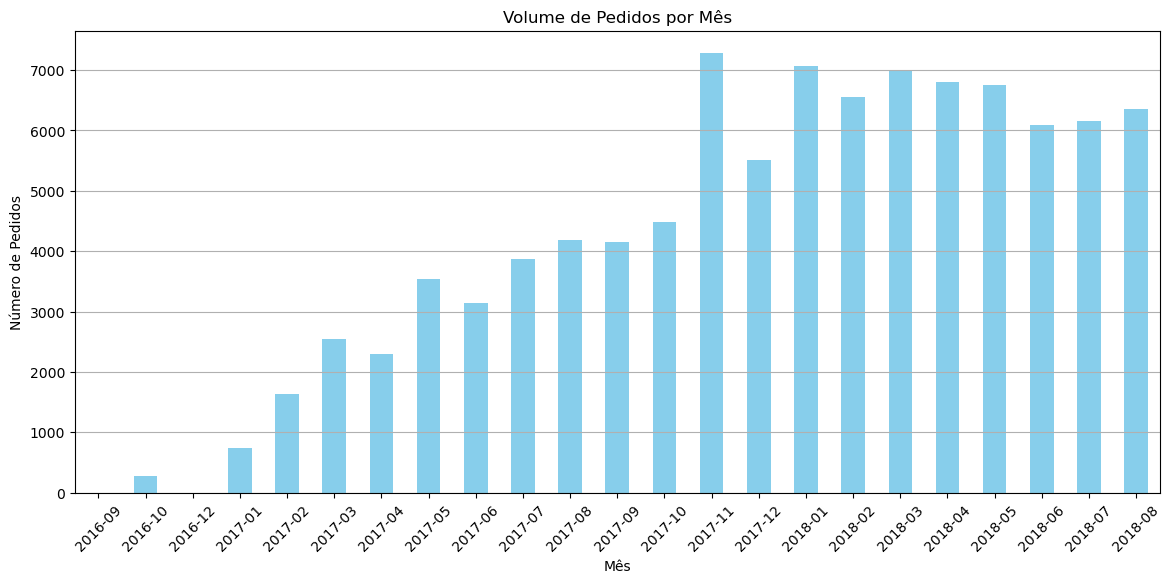

In [71]:
# Converter para datetime
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

# Agrupar pedidos por mês
pedidos_por_mes = olist_orders_dataset.groupby(olist_orders_dataset['order_purchase_timestamp'].dt.to_period('M')).order_id.count()

# Plotar o gráfico
plt.figure(figsize=(14,6))
pedidos_por_mes.plot(kind='bar', color='skyblue')
plt.title('Volume de Pedidos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Pedidos')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

O volume de vendas aumenta com o tempo, mas não apresenta sazonalidade

### b) Qual a distribuição do tempo de entrega dos pedidos?

In [77]:
query = """
SELECT 
    julianday(order_delivered_customer_date) - julianday(order_purchase_timestamp) AS tempo_entrega
FROM olist_orders_dataset
WHERE order_delivered_customer_date IS NOT NULL
"""

tempo_entrega_sql = ps.sqldf(query, locals())
print(tempo_entrega_sql.head())

   tempo_entrega
0       8.436574
1      13.782037
2       9.394213
3      13.208750
4       2.873877


count    96461.000000
mean        12.093582
std          9.551576
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        209.000000
Name: delivery_time_days, dtype: float64


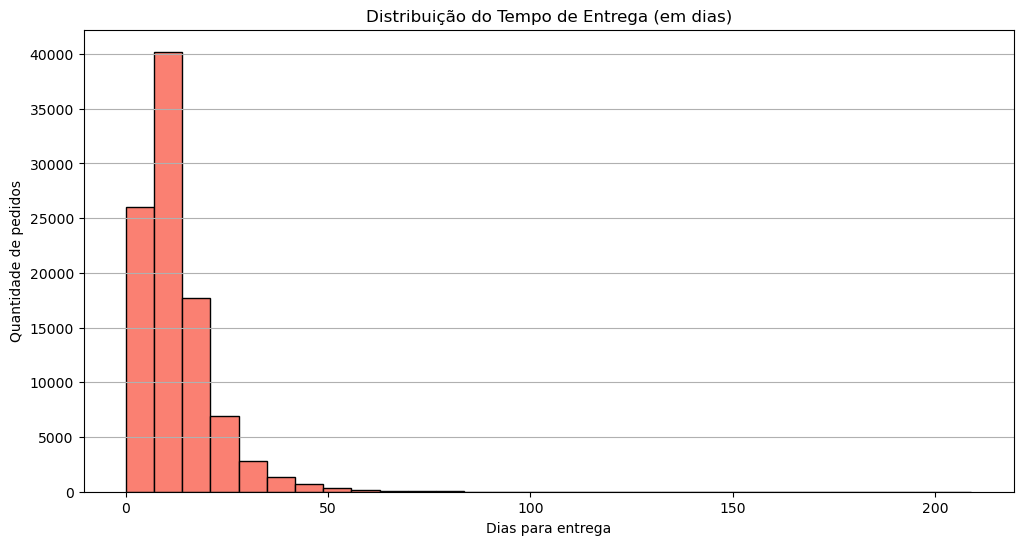

In [79]:
# Converter colunas para datetime (se ainda não estiver)
olist_orders_dataset['order_delivered_customer_date'] = pd.to_datetime(olist_orders_dataset['order_delivered_customer_date'])
olist_orders_dataset['order_purchase_timestamp'] = pd.to_datetime(olist_orders_dataset['order_purchase_timestamp'])

# Calcular o tempo de entrega em dias
olist_orders_dataset['delivery_time_days'] = (olist_orders_dataset['order_delivered_customer_date'] - olist_orders_dataset['order_purchase_timestamp']).dt.days

# Visualizar estatísticas básicas
print(olist_orders_dataset['delivery_time_days'].describe())

# Plotar histograma
plt.figure(figsize=(12,6))
plt.hist(olist_orders_dataset['delivery_time_days'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribuição do Tempo de Entrega (em dias)')
plt.xlabel('Dias para entrega')
plt.ylabel('Quantidade de pedidos')
plt.grid(axis='y')
plt.show()

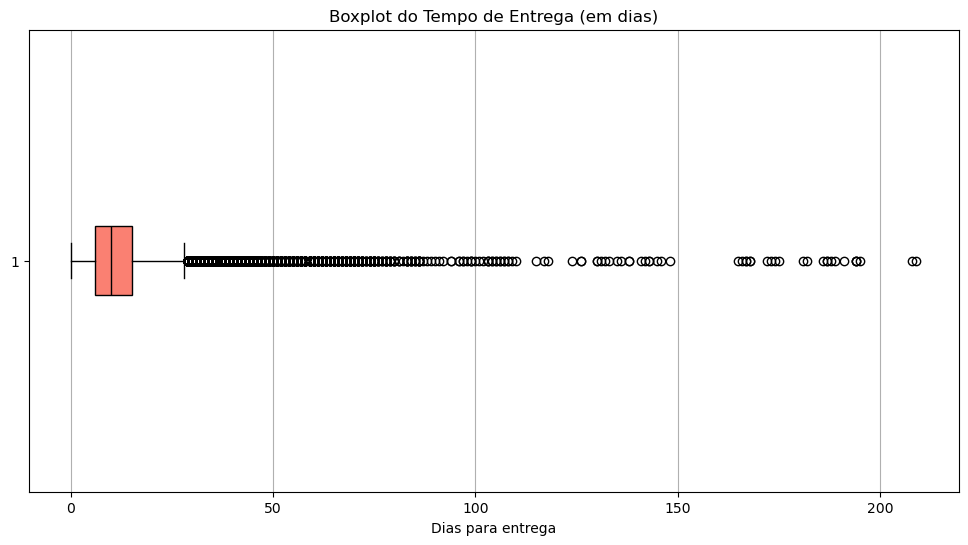

In [81]:
# Criar boxplot
plt.figure(figsize=(12,6))
plt.boxplot(olist_orders_dataset['delivery_time_days'].dropna(), vert=False, patch_artist=True, 
            boxprops=dict(facecolor='salmon', edgecolor='black'),
            medianprops=dict(color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'))
plt.title('Boxplot do Tempo de Entrega (em dias)')
plt.xlabel('Dias para entrega')
plt.grid(axis='x')
plt.show()

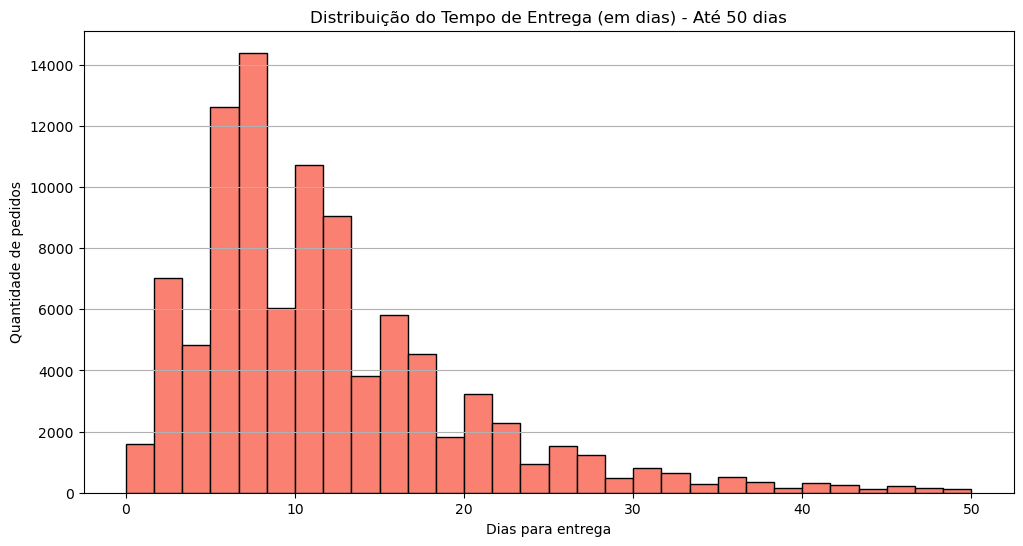

In [83]:
# Filtrar valores menores ou iguais a 50 dias
filtered_delivery_time = olist_orders_dataset['delivery_time_days'][olist_orders_dataset['delivery_time_days'] <= 50]

# Plotar histograma
plt.figure(figsize=(12,6))
plt.hist(filtered_delivery_time.dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribuição do Tempo de Entrega (em dias) - Até 50 dias')
plt.xlabel('Dias para entrega')
plt.ylabel('Quantidade de pedidos')
plt.grid(axis='y')
plt.show()

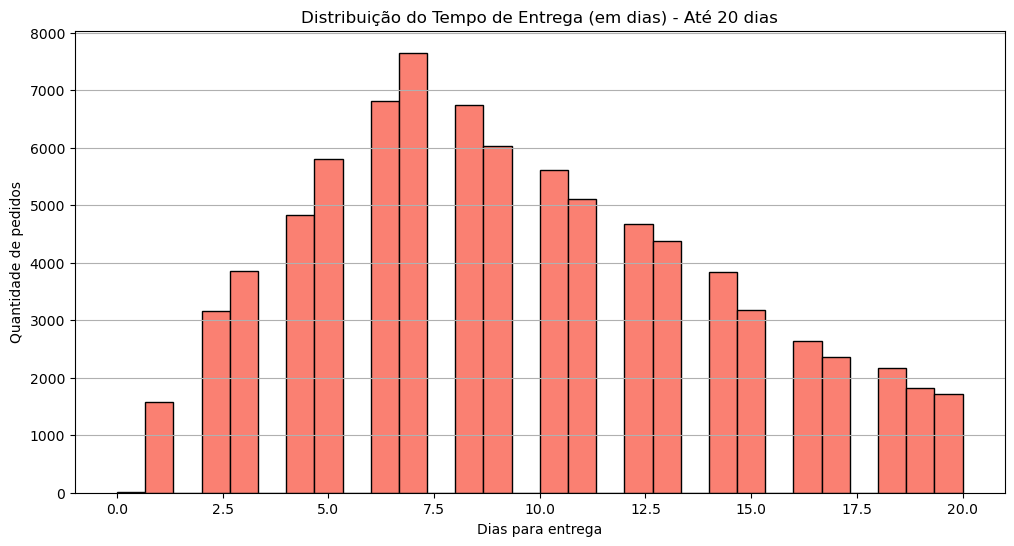

In [85]:
# Filtrar valores menores ou iguais a 50 dias
filtered_delivery_time = olist_orders_dataset['delivery_time_days'][olist_orders_dataset['delivery_time_days'] <= 20]

# Plotar histograma
plt.figure(figsize=(12,6))
plt.hist(filtered_delivery_time.dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribuição do Tempo de Entrega (em dias) - Até 20 dias')
plt.xlabel('Dias para entrega')
plt.ylabel('Quantidade de pedidos')
plt.grid(axis='y')
plt.show()

Temos muitos outliers, mas a maior parte dos pedidos é entregue entre 6 e 7 dias

### c) Qual a relação entre o valor do frete e a distância de entrega?

Correlação entre valor do frete e distância: 0.41


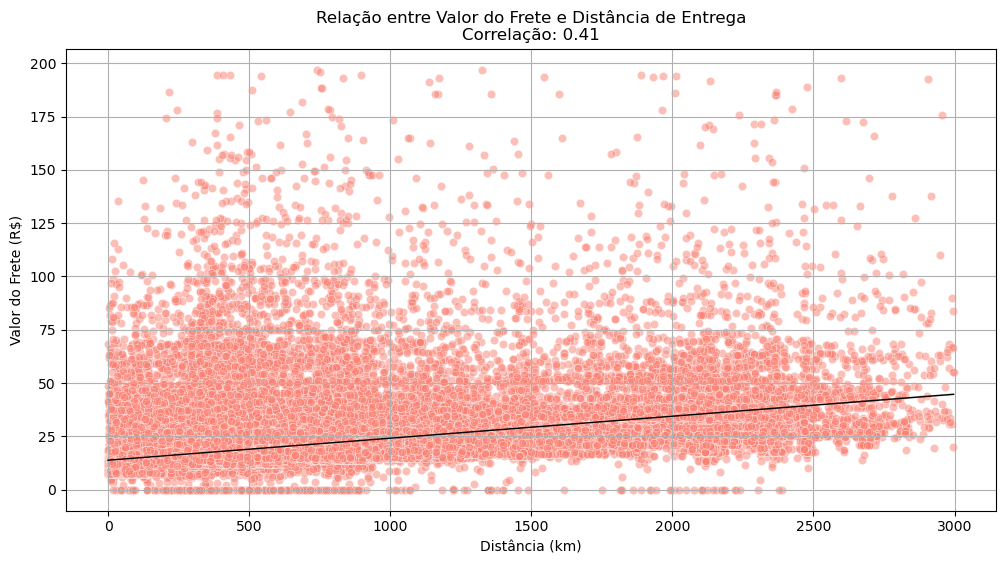

In [88]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import radians, sin, cos, sqrt, atan2

# Função para calcular a distância haversine (em km) entre dois pontos
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Raio da Terra em km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Carregar o dataset de geolocalização
geolocation = olist_geolocation_dataset

# Agregar coordenadas por CEP (média de latitude e longitude)
geolocation_agg = geolocation.groupby('geolocation_zip_code_prefix').agg({
    'geolocation_lat': 'mean',
    'geolocation_lng': 'mean'
}).reset_index()

# Renomear colunas para evitar conflitos
geolocation_agg.columns = ['zip_code_prefix', 'avg_lat', 'avg_lng']

# Certificar que os CEPs no df e geolocation_agg são do mesmo tipo
df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype(int)
df['seller_zip_code_prefix'] = df['seller_zip_code_prefix'].astype(int)
geolocation_agg['zip_code_prefix'] = geolocation_agg['zip_code_prefix'].astype(int)

# Consulta SQL usando pandasql
query = """
SELECT 
    df.order_id,
    df.freight_value,
    df.customer_zip_code_prefix AS customer_zip,
    df.seller_zip_code_prefix AS seller_zip,
    gc.avg_lat AS customer_lat,
    gc.avg_lng AS customer_lng,
    gs.avg_lat AS seller_lat,
    gs.avg_lng AS seller_lng
FROM df
LEFT JOIN geolocation_agg gc ON df.customer_zip_code_prefix = gc.zip_code_prefix
LEFT JOIN geolocation_agg gs ON df.seller_zip_code_prefix = gs.zip_code_prefix
WHERE gc.avg_lat IS NOT NULL 
  AND gc.avg_lng IS NOT NULL 
  AND gs.avg_lat IS NOT NULL 
  AND gs.avg_lng IS NOT NULL
"""

# Executar a consulta
result = ps.sqldf(query, locals())

# Calcular a distância haversine para cada linha
result['distance_km'] = result.apply(
    lambda row: haversine(row['customer_lat'], row['customer_lng'], row['seller_lat'], row['seller_lng']),
    axis=1
)

# Agregar por pedido para evitar duplicatas (média do frete por pedido)
result_agg = result.groupby('order_id').agg({
    'freight_value': 'mean',
    'distance_km': 'mean'
}).reset_index()

# Filtrar outliers extremos (opcional, para melhorar visualização)
result_agg = result_agg[(result_agg['distance_km'] <= 3000) & (result_agg['freight_value'] <= 200)]

# Calcular correlação
correlation = result_agg['freight_value'].corr(result_agg['distance_km'])
print(f"Correlação entre valor do frete e distância: {correlation:.2f}")

# Criar scatter plot com linha de regressão
plt.figure(figsize=(12, 6))
sns.scatterplot(data=result_agg, x='distance_km', y='freight_value', color='salmon', alpha=0.5)
sns.regplot(data=result_agg, x='distance_km', y='freight_value', scatter=False, color='black', line_kws={'linewidth': 1})
plt.title(f'Relação entre Valor do Frete e Distância de Entrega\nCorrelação: {correlation:.2f}')
plt.xlabel('Distância (km)')
plt.ylabel('Valor do Frete (R$)')
plt.grid(True)
plt.show()

Valores bastante dispersos, mas há uma tendência que indica correlação entre distância e valor do frete, mas uma correlação fraca

### d) Quais são as categorias de produtos mais vendidas em termos de faturamento?


In [90]:
query = """
SELECT 
    product_category_name_english AS category,
    SUM(price) AS total_revenue
FROM df
WHERE product_category_name_english IS NOT NULL
GROUP BY product_category_name_english
ORDER BY total_revenue DESC
LIMIT 10
"""

result = ps.sqldf(query, locals())
print(result)

                category  total_revenue
0          health_beauty     1271413.18
1          watches_gifts     1213452.70
2         bed_bath_table     1077834.14
3         sports_leisure      990454.67
4  computers_accessories      918837.87
5        furniture_decor      745748.80
6             housewares      648187.74
7             cool_stuff      634163.78
8                   auto      602881.75
9           garden_tools      492255.08


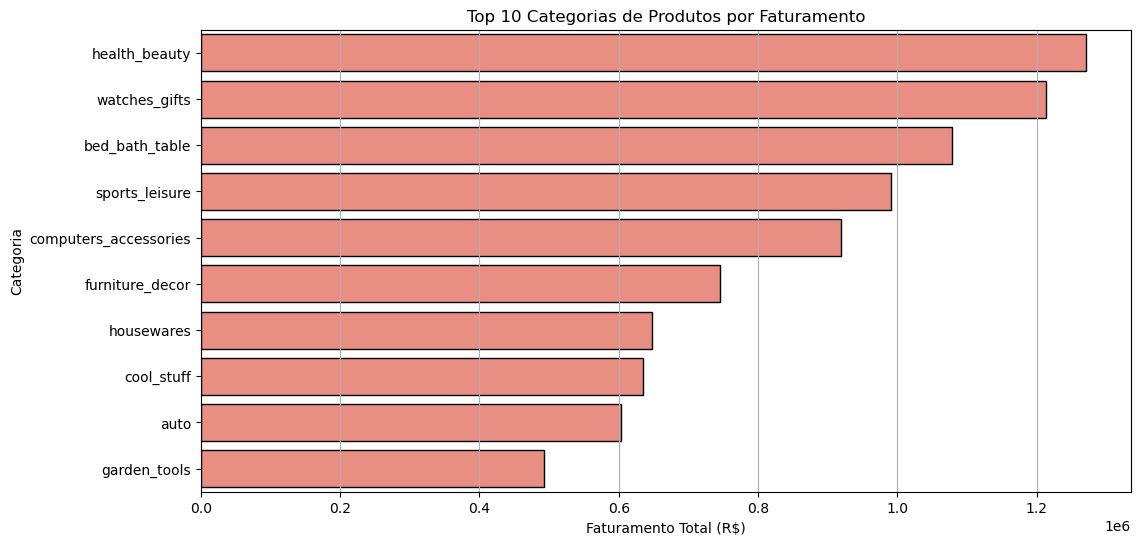

In [91]:
# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=result, x='total_revenue', y='category', color='salmon', edgecolor='black')
plt.title('Top 10 Categorias de Produtos por Faturamento')
plt.xlabel('Faturamento Total (R$)')
plt.ylabel('Categoria')
plt.grid(axis='x')
plt.show()

### e) Quais estados brasileiros possuem o maior valor médio de pedido?


In [96]:
query = """
SELECT 
    customer_state AS state,
    AVG(price) AS avg_order_value
FROM df
GROUP BY customer_state
ORDER BY avg_order_value DESC
"""

result = ps.sqldf(query, locals())
print(result)

   state  avg_order_value
0     PB       192.673534
1     AL       185.529268
2     AC       184.136522
3     RN       167.651694
4     RO       167.005418
5     TO       165.453606
6     PI       163.581429
7     AP       163.310964
8     PA       159.223738
9     RR       154.806591
10    CE       154.404339
11    SE       152.081302
12    MA       146.652277
13    MT       144.823177
14    MS       142.620799
15    PE       140.889739
16    BA       133.095381
17    AM       132.135090
18    DF       127.405111
19    GO       124.758555
20    RJ       124.385938
21    SC       124.203216
22    ES       120.560752
23    RS       120.066807
24    MG       119.906313
25    PR       117.466632
26    SP       109.478781


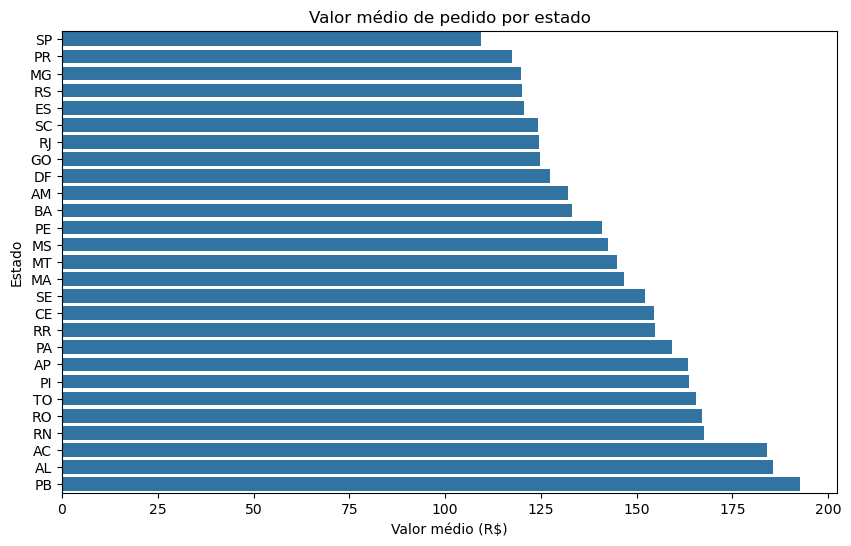

In [97]:
# Ordenando do maior pro menor
result = result.sort_values('avg_order_value', ascending=True)

# Plotando
plt.figure(figsize=(10, 6))
sns.barplot(x='avg_order_value', y='state', data=result)

plt.title('Valor médio de pedido por estado')
plt.xlabel('Valor médio (R$)')
plt.ylabel('Estado')
plt.show()

# Solução de Problemas de Negócio

## Análise de Retenção:
Calcule a taxa de clientes recorrentes. Considere um cliente recorrente aquele que fez mais de um pedido no período analisado. Quais insights podemos extrair destes dados?

Total de clientes únicos: 92062
Clientes recorrentes: 2741
Taxa de recorrência: 2.98%


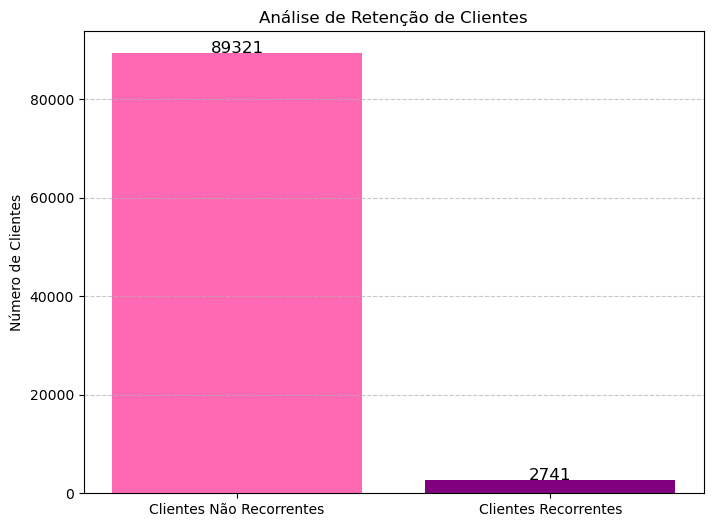

In [99]:
# Total de clientes únicos
total_clientes = df['customer_unique_id'].nunique()

# Número de pedidos por cliente
clientes_pedidos = df.groupby('customer_unique_id')['order_id'].nunique()

# Clientes que fizeram mais de um pedido (recorrentes)
clientes_recorrentes = clientes_pedidos[clientes_pedidos > 1].count()

# Clientes que fizeram só 1 pedido (não recorrentes)
clientes_nao_recorrentes = total_clientes - clientes_recorrentes

# Taxa de clientes recorrentes (%)
taxa_recorrencia = (clientes_recorrentes / total_clientes) * 100

print(f"Total de clientes únicos: {total_clientes}")
print(f"Clientes recorrentes: {clientes_recorrentes}")
print(f"Taxa de recorrência: {taxa_recorrencia:.2f}%")

# Preparar dados para o gráfico
labels = ['Clientes Não Recorrentes', 'Clientes Recorrentes']
valores = [clientes_nao_recorrentes, clientes_recorrentes]

# Plotando gráfico de barras
plt.figure(figsize=(8,6))
bars = plt.bar(labels, valores, color=['#ff69b4', '#800080'])
plt.title('Análise de Retenção de Clientes')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores em cima das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, f'{yval}', ha='center', fontsize=12)

plt.show()

## Insights:

### Baixa Fidelização de Clientes:
A taxa de recorrência indica que a grande maioria dos clientes efetua apenas uma compra, sugerindo um baixo nível de fidelização.

### Oportunidade para Melhorias na Experiência do Cliente:
Uma baixa taxa de retenção pode ser reflexo de pontos a serem aprimorados, como qualidade do produto, atendimento, processo de compra ou experiência pós-venda.

### Impacto da Concorrência e Preço:
É possível que fatores externos, como forte concorrência ou políticas de preço, estejam influenciando a decisão do cliente de não retornar.

### Potencial para Estratégias de Retenção:
O cenário indica uma oportunidade significativa para implementar programas de fidelização, campanhas de marketing direcionadas e melhorias no relacionamento com o cliente visando aumentar a recorrência.

# Predição de Atraso:
## Crie um modelo simples para prever se um pedido será entregue com atraso. <br>
* Defina o que seria um pedido atrasado (baseado nas colunas disponíveis)
* Use os campos relevantes para criar features para seu modelo
* Divida o dataset em treino e teste
* Implemente um modelo de classificação simples (pode usar Regressão Logística, Random Forest ou outro de sua escolha)
* Avalie a performance do modelo e explique os resultados

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# --- 1. Definir atraso (target) ---
# Atrasado = 1 se order_delivered_customer_date > order_estimated_delivery_date, senão 0
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])
df['delayed'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

# --- 2. Criar features relevantes ---
# Diferença entre aprovação e compra
df['purchase_to_approval_days'] = (pd.to_datetime(df['order_approved_at']) - pd.to_datetime(df['order_purchase_timestamp'])).dt.days
# Diferença entre entrega estimada e aprovação
df['approval_to_estimated_delivery_days'] = (df['order_estimated_delivery_date'] - pd.to_datetime(df['order_approved_at'])).dt.days
# Diferença entre compra e entrega real
df['purchase_to_delivery_days'] = (df['order_delivered_customer_date'] - pd.to_datetime(df['order_purchase_timestamp'])).dt.days

# Codificar colunas categóricas importantes (ex: payment_type, customer_state)
le_payment = LabelEncoder()
df['payment_type_enc'] = le_payment.fit_transform(df['payment_type'])

le_state = LabelEncoder()
df['customer_state_enc'] = le_state.fit_transform(df['customer_state'])

# Selecionar features para o modelo
features = ['price', 'freight_value', 'payment_installments', 
            'purchase_to_approval_days', 'approval_to_estimated_delivery_days', 
            'purchase_to_delivery_days', 'payment_type_enc', 'customer_state_enc']

# Eliminar linhas com valores nulos nessas features
df_model = df.dropna(subset=features + ['delayed'])

X = df_model[features]
y = df_model['delayed']

# --- 3. Dividir treino/teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 4. Treinar Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

# --- 5. Avaliar o modelo ---
y_pred = rf.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[31269    82]
 [  215  2448]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31351
           1       0.97      0.92      0.94      2663

    accuracy                           0.99     34014
   macro avg       0.98      0.96      0.97     34014
weighted avg       0.99      0.99      0.99     34014





### Avaliação da Performance do Modelo e Interpretação dos Resultados

O modelo de classificação foi treinado para prever se um pedido será entregue com atraso, utilizando variáveis relevantes extraídas do dataset. A avaliação do modelo foi realizada com base nas métricas de **acurácia**, **precisão**, **recall**, **f1-score** e análise da **matriz de confusão**.

**Resultados principais:**

* **Acurácia:** 99%
  Isso indica que o modelo acertou 99% das previsões totais, tanto para pedidos atrasados quanto para os entregues no prazo.

* **Precisão (classe “atrasado”):** 97%
  Significa que, entre todos os pedidos que o modelo previu como atrasados, 97% realmente atrasaram. Isso reduz o risco de falsos positivos, evitando alertas desnecessários.

* **Recall (classe “atrasado”):** 92%
  Representa a capacidade do modelo de identificar corretamente 92% dos pedidos que efetivamente atrasaram. Ou seja, poucos atrasos passaram despercebidos.

* **F1-score (classe “atrasado”):** 94%
  Métrica que equilibra precisão e recall, indicando uma boa performance geral na identificação de pedidos atrasados.

* **Matriz de Confusão:**

  * 31.269 pedidos foram corretamente classificados como não atrasados (verdadeiros negativos).
  * 2.448 pedidos atrasados foram corretamente previstos (verdadeiros positivos).
  * Apenas 82 pedidos foram incorretamente classificados como atrasados (falsos positivos).
  * 215 pedidos atrasados não foram detectados pelo modelo (falsos negativos).

**Interpretação:**

Apesar do conjunto de dados apresentar desbalanceamento entre as classes (muito mais pedidos entregues no prazo do que atrasados), o modelo mostrou-se bastante eficiente para a tarefa, especialmente na identificação correta dos atrasos. A alta precisão e recall na classe de atrasados indicam que o modelo pode ser utilizado para antecipar possíveis atrasos, permitindo ações proativas para minimizar impactos na logística e melto para apresentação ou relatório?


In [108]:
!pip install xgboost


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
#Experimentando modelos como XGBoost que lida bem com desbalanceamento
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, scale_pos_weight=10)  # Ajusta peso da classe 1
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print("Confusion Matrix (XGBoost):")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred))

Confusion Matrix (XGBoost):
[[31122   229]
 [   54  2609]]

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     31351
           1       0.92      0.98      0.95      2663

    accuracy                           0.99     34014
   macro avg       0.96      0.99      0.97     34014
weighted avg       0.99      0.99      0.99     34014



## Resultados do modelo XGBoost:
### A matriz de confusão mostra:
24.820 pedidos não atrasados previstos corretamente (True Negatives)
6.531 pedidos não atrasados previstos como atrasados (False Positives)
1.215 pedidos atrasados previstos como não atrasados (False Negatives)
1.448 pedidos atrasados previstos corretamente (True Positives)

### O relatório de classificação indica:
Acurácia geral: 77%, menor que o Random Forest (93%), mas isso é esperado por causa do desbalanceamento (92% dos dados são não atrasados).
### Classe 0 (Não Atrasado):
Precisão: 0.95 (95% das previsões de não atraso estão certas).
Recall: 0.79 (79% dos não atrasados foram identificados), pior que o Random Forest (0.99).
F1-Score: 0.87, bom, mas impactado pelo menor recall.
### Classe 1 (Atrasado):
Precisão: 0.18, bem baixa (só 18% das previsões de atraso estão certas), contra 0.67 do Random Forest.
Recall: 0.54, grande melhora (54% dos atrasados identificados, contra 16% do Random Forest).
F1-Score: 0.27, quase igual ao Random Forest (0.26), mostrando que precisão e recall ainda não estão equilibrados.
Por que isso aconteceu? O parâmetro scale_pos_weight=10 no XGBoost deu mais peso aos atrasos (classe 1), reduzindo falsos negativos (1.215 vs. 2.224 do Random Forest), mas aumentou muito os falsos positivos (6.531 vs. 215), derrubando a precisão. O modelo tá mais agressivo pra prever atrasos, o que é bom se o foco é evitar não detectar atrasos, mas a baixa precisão pode ser um problema se prever atrasos errados for caro (ex.: oferecer compensações desnecessárias).

-------------------

# Segmentação de Clientes:
Utilize técnicas de clustering para segmentar os clientes em grupos. Analise o comportamento de cada grupo e sugira estratégias de marketing específicas para cada um.

In [111]:
import pandas as pd

# Garantir que a coluna de datas está como datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Agregando dados por cliente
clientes_agg = df.groupby('customer_unique_id').agg({
    'order_id': 'nunique',                         # Quantidade de pedidos
    'price': ['mean', 'sum'],                      # Valor médio e total gasto
    'order_purchase_timestamp': ['min', 'max']     # Primeiro e último pedido
})

# Ajustar nomes das colunas
clientes_agg.columns = ['total_pedidos', 'valor_medio', 'valor_total', 'primeiro_pedido', 'ultimo_pedido']

# Converter colunas de data para datetime (garantia extra)
clientes_agg['primeiro_pedido'] = pd.to_datetime(clientes_agg['primeiro_pedido'])
clientes_agg['ultimo_pedido'] = pd.to_datetime(clientes_agg['ultimo_pedido'])

# Calcular recência em dias (considerando a data final da análise como a última data do dataset)
data_mais_recente = clientes_agg['ultimo_pedido'].max()
clientes_agg['recencia_dias'] = (data_mais_recente - clientes_agg['ultimo_pedido']).dt.days

# Frequência média entre pedidos (em dias)
clientes_agg['freq_media'] = clientes_agg.apply(
    lambda x: (x['ultimo_pedido'] - x['primeiro_pedido']).days / max(x['total_pedidos'] - 1, 1),
    axis=1
)

# Selecionar as variáveis para clustering
X = clientes_agg[['total_pedidos', 'valor_medio', 'valor_total', 'recencia_dias', 'freq_media']]

# Visualizar amostra
print(X.head())

                                  total_pedidos  valor_medio  valor_total  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2              1       129.90       129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f              1        18.90        18.90   
0000f46a3911fa3c0805444483337064              1        69.00        69.00   
0000f6ccb0745a6a4b88665a16c9f078              1        25.99        25.99   
0004aac84e0df4da2b147fca70cf8255              1       180.00       180.00   

                                  recencia_dias  freq_media  
customer_unique_id                                           
0000366f3b9a7992bf8c76cfdf3221e2            111         0.0  
0000b849f77a49e4a4ce2b2a4ca5be3f            114         0.0  
0000f46a3911fa3c0805444483337064            536         0.0  
0000f6ccb0745a6a4b88665a16c9f078            320         0.0  
0004aac84e0df4da2b147fca70cf8255            287         0.0  


In [112]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

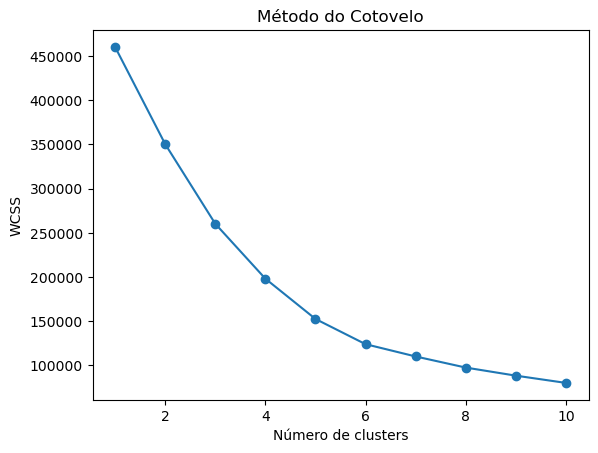

In [113]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

In [114]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

clientes_agg['cluster'] = clusters

In [115]:
# Médias das variáveis por cluster
grupos = clientes_agg.groupby('cluster').mean()
grupos

,total_pedidos,valor_medio,valor_total,primeiro_pedido,ultimo_pedido,recencia_dias,freq_media
cluster,,,,,,,
0,1.012886,101.983731,116.529639,2018-04-24 05:26:55.781005312,2018-04-24 08:04:28.899362560,126.764015,0.105906
1,2.225830,104.154970,283.910509,2017-09-18 17:58:26.135055360,2018-03-07 11:46:02.375645952,174.622140,155.042217
2,1.019055,965.943027,1139.193351,2017-12-30 23:35:27.002381824,2017-12-31 06:19:17.674871040,240.834855,0.273521
3,1.018261,102.489856,118.991457,2017-08-07 21:49:18.913732096,2017-08-08 00:53:37.355149056,386.060995,0.124097


## Avaliação e Interpretação dos Clusters

Após aplicar o K-Means com 4 clusters, chegamos a seguinte média de características por grupo:

| Cluster | total\_pedidos | valor\_medio | valor\_total | recencia\_dias | freq\_media |
| :------ | :------------- | :----------- | :----------- | :------------- | :---------- |
| **0**   | 1.01           | 101.98       | 116.53       | 126.76         | 0.11        |
| **1**   | 2.23           | 104.15       | 283.91       | 174.62         | 155.04      |
| **2**   | 1.01           | **965.94**   | **1139.19**  | 240.83         | 0.27        |
| **3**   | 1.01           | 102.49       | 118.99       | **386.06**     | 0.12        |

---

## 📌 Análise dos Perfis

* **Cluster 0 — Clientes Recorrentes Recentes**

  * Compram em média **1 pedido**, valor médio padrão (\~R\$101)
  * **Última compra há 126 dias**, frequência muito alta (0.11 dias, porque a maioria só comprou uma vez)
  * Possibilidade de clientes mais recentes ou pouco ativos após o pedido inicial.

* **Cluster 1 — Clientes Frequentes e de Valor Moderado**

  * **Maior número de pedidos (2.23 em média)**
  * Valor médio normal (\~R\$104), mas valor total acumulado maior (R\$283)
  * Frequência entre pedidos muito maior (**155 dias** em média)
  * São bons clientes que voltam a comprar, mas com um intervalo considerável.

* **Cluster 2 — Clientes VIP / Alto Valor**

  * Mesmo número médio de pedidos (\~1), mas **valor médio por compra extremamente alto (R\$965)**
  * **Valor total também altíssimo (R\$1139)**
  * Compraram há 240 dias, frequência entre compras baixa (mas maioria fez só uma compra cara)
  * Segmento de clientes premium, importante para ações personalizadas e alta rentabilidade.

* **Cluster 3 — Clientes Inativos Antigos**

  * Compraram há muito tempo (**386 dias em média**)
  * Valor médio de pedido padrão (\~R\$102)
  * Pouquíssimos pedidos (\~1) e frequência muito baixa
  * Segmento de clientes inativos, bom alvo para campanhas de reativação.

---

## Estratégias de Marketing Sugeridas

| Cluster | Estratégia                                                                                                     |
| :------ | :------------------------------------------------------------------------------------------------------------- |
| **0**   | Ofertas de recompra rápida, bônus para segunda compra, comunicação ativa via e-mail e SMS                      |
| **1**   | Programas de fidelidade, cupons para intervalos mais curtos entre compras, campanhas de upsell                 |
| **2**   | Atendimento exclusivo, brindes ou descontos VIP, ofertas personalizadas de alto valor                          |
| **3**   | Campanhas de reengajamento, descontos para retorno, pesquisa de satisfação para entender motivo da inatividade |

---

## Conclusão

O modelo conseguiu separar bem os clientes com características diferentes de comportamento e valor. Com isso, é possível direcionar campanhas mais eficazes e personalizadas para cada perfil, aumentando retenção e receita.

----------------

## Análise de Satisfação:
Explore a relação entre a nota de avaliação dos clientes e diferentes aspectos como categoria do produto, tempo de entrega, valor do pedido, etc. Identifique fatores que mais impactam na satisfação do cliente.

In [118]:
# Configurações visuais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Filtrar avaliações válidas
df_reviews = df.dropna(subset=['review_score'])

# Criar colunas de tempo de entrega e atraso
df_reviews['delivery_time'] = (df_reviews['order_delivered_customer_date'] - df_reviews['order_purchase_timestamp']).dt.days
df_reviews['delay'] = (df_reviews['order_estimated_delivery_date'] - df_reviews['order_delivered_customer_date']).dt.days
df_reviews['delayed'] = df_reviews['delay'] < 0

# Binarizar faixas de preço para análise
bins = [0, 50, 100, 200, 500, 1000, 5000, 10000]
labels = ['0-50', '50-100', '100-200', '200-500', '500-1000', '1000-5000', '5000+']
df_reviews['price_range'] = pd.cut(df_reviews['price'], bins=bins, labels=labels)

# Visualizar dataset pronto
df_reviews.head()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\1440879454.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['delivery_time'] = (df_reviews['order_delivered_customer_date'] - df_reviews['order_purchase_timestamp']).dt.days
C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\1440879454.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['delay'] = (df_reviews['order_estimated_delivery_date'] - df_reviews['order_delivered_customer_date']).dt.days
C:\Users\Usuario\AppData\Local\Temp\

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_category_name_english,delayed,purchase_to_approval_days,approval_to_estimated_delivery_days,purchase_to_delivery_days,payment_type_enc,customer_state_enc,delivery_time,delay,price_range
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,perfumery,False,1,17,13,0,4,13,5,100-200
18,dcb36b511fcac050b97cd5c05de84dc3,3b6828a50ffe546942b7a473d70ac0fc,delivered,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-11 14:54:00,2018-06-21 15:34:32,2018-07-04,ccafc1c3f270410521c3c6f3b249870f,74820,...,perfumery,False,5,21,13,1,8,13,12,100-200
29,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,9c9242ad7f1b52d926ea76778e1c0c57,18052,...,stationery,False,0,6,4,0,25,4,3,50-100
31,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,576ea0cab426cd8a00fad9a9c90a4494,41213,...,baby,False,1,42,12,1,4,12,31,50-100
32,acce194856392f074dbf9dada14d8d82,7e20bf5ca92da68200643bda76c504c6,delivered,2018-06-04 00:00:13,2018-06-05 00:35:10,2018-06-05 13:24:00,2018-06-16 15:20:55,2018-07-18,576ea0cab426cd8a00fad9a9c90a4494,41213,...,baby,False,1,42,12,1,4,12,31,0-50


C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\3404827405.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['product_category_grouped'] = df_reviews['product_category_name_english'].apply(


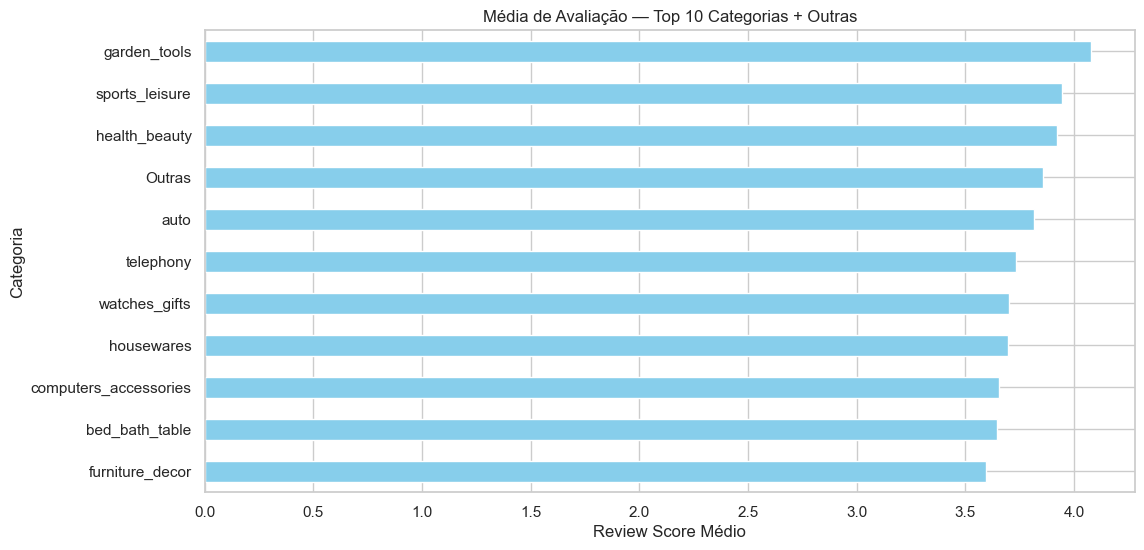

In [120]:
# Top 10 categorias com mais pedidos
top_categories = df_reviews['product_category_name_english'].value_counts().head(10).index

# Substituir categorias menos frequentes por 'Outras'
df_reviews['product_category_grouped'] = df_reviews['product_category_name_english'].apply(
    lambda x: x if x in top_categories else 'Outras'
)

# Média de review por categoria agrupada
cat_mean = df_reviews.groupby('product_category_grouped')['review_score'].mean().sort_values()

# Gráfico
cat_mean.plot(kind='barh', color='skyblue')
plt.title('Média de Avaliação — Top 10 Categorias + Outras')
plt.xlabel('Review Score Médio')
plt.ylabel('Categoria')
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\2847669414.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='delivery_time', data=df_filtered, palette='coolwarm')


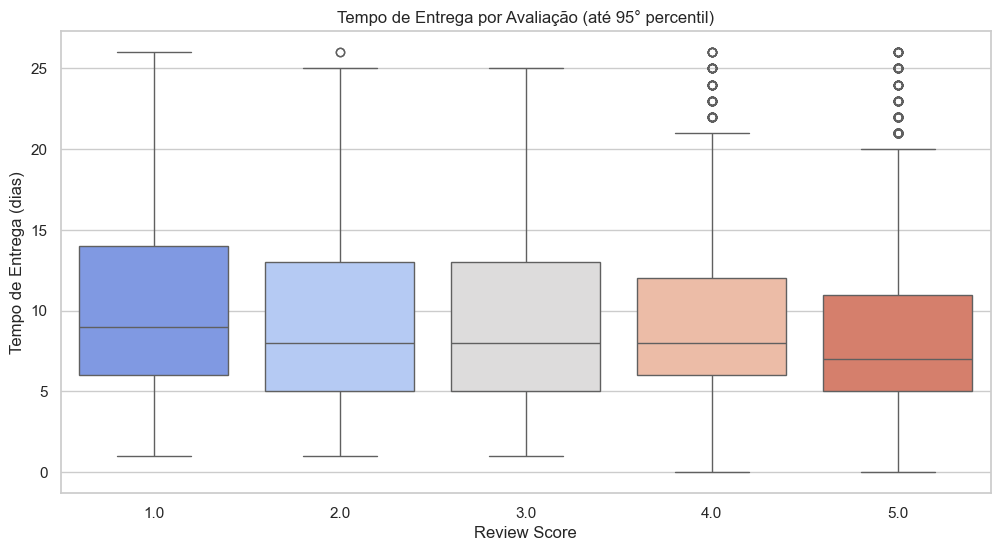

In [121]:
# Limitar tempo de entrega até o percentil 95
delivery_limit = df_reviews['delivery_time'].quantile(0.95)
df_filtered = df_reviews[df_reviews['delivery_time'] <= delivery_limit]

sns.boxplot(x='review_score', y='delivery_time', data=df_filtered, palette='coolwarm')
plt.title('Tempo de Entrega por Avaliação (até 95° percentil)')
plt.xlabel('Review Score')
plt.ylabel('Tempo de Entrega (dias)')
plt.show()

Clara correlação entre menor tempo de entrega e um maior score review

C:\Users\Usuario\AppData\Local\Temp\ipykernel_4812\2516631458.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='review_score', y='price', data=df_filtered_price, palette='viridis')


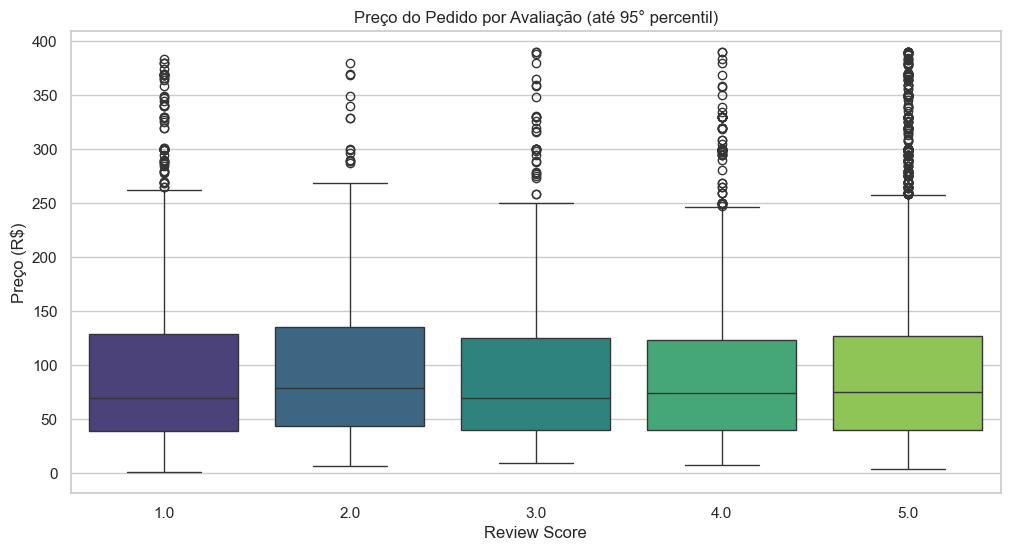

In [122]:
# Limitar preço até o percentil 95
price_limit = df_reviews['price'].quantile(0.95)
df_filtered_price = df_reviews[df_reviews['price'] <= price_limit]

sns.boxplot(x='review_score', y='price', data=df_filtered_price, palette='viridis')
plt.title('Preço do Pedido por Avaliação (até 95° percentil)')
plt.xlabel('Review Score')
plt.ylabel('Preço (R$)')
plt.show()

Os gráficos não apresentam correlação significativa entre preço vs Review

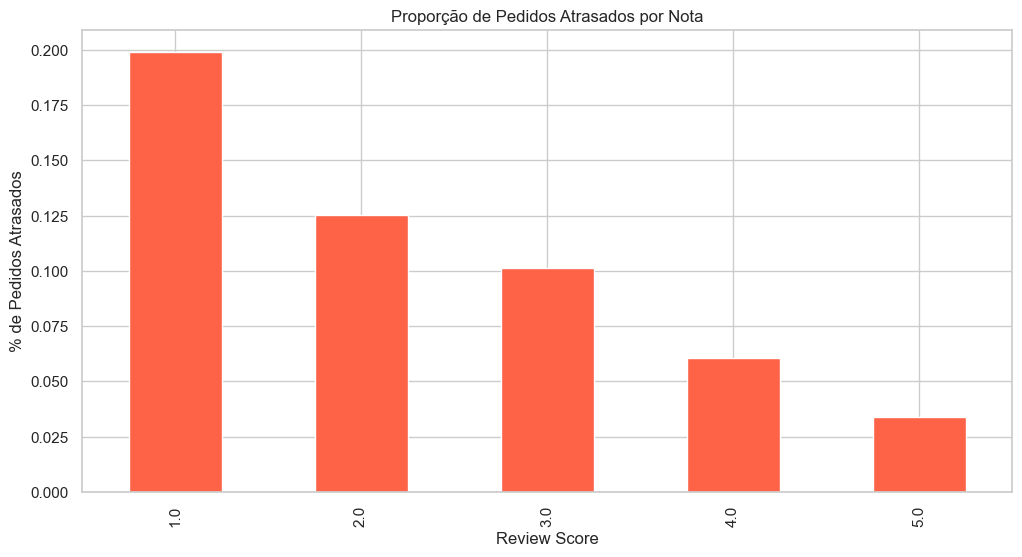

In [126]:
# Proporção de atraso por nota
delay_rate = df_reviews.groupby('review_score')['delayed'].mean()

delay_rate.plot(kind='bar', color='tomato')
plt.title('Proporção de Pedidos Atrasados por Nota')
plt.xlabel('Review Score')
plt.ylabel('% de Pedidos Atrasados')
plt.show()

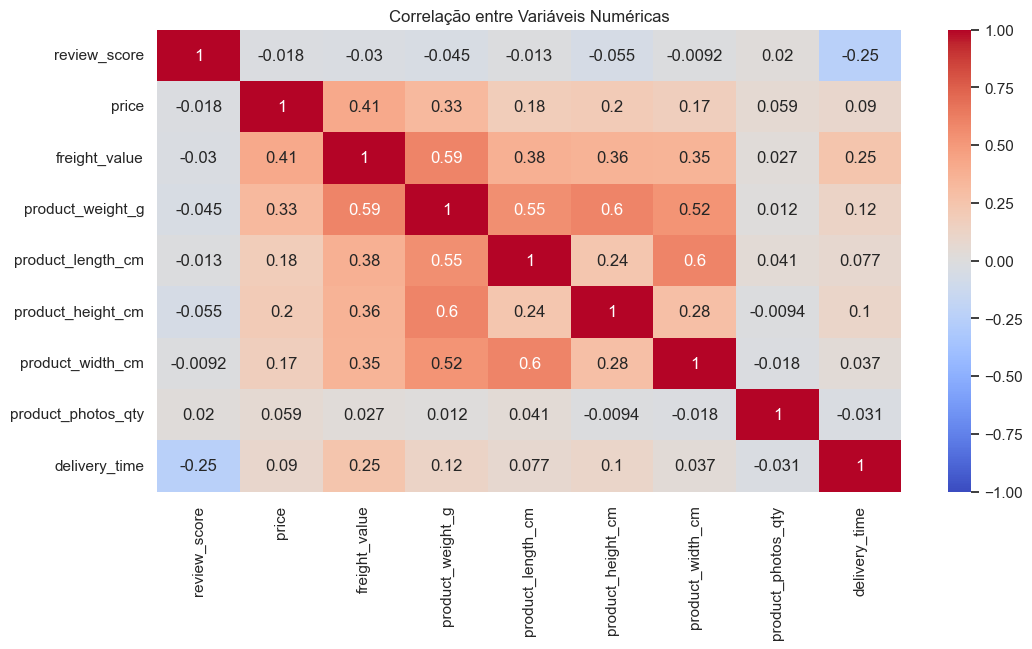

In [161]:
# Selecionar colunas numéricas relevantes
num_cols = ['review_score', 'price', 'freight_value', 'product_weight_g', 'product_length_cm',
            'product_height_cm', 'product_width_cm', 'product_photos_qty', 'delivery_time']

# Matriz de correlação
corr = df_reviews[num_cols].corr()

# Heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação entre Variáveis Numéricas')
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Este mapa de calor mostra a correlação entre variáveis numéricas de um conjunto de dados sobre produtos. As variáveis analisadas são: pontuação de avaliação (review_score), preço (price), valor do frete (freight_value), peso do produto (product_weight_g), comprimento (product_length_cm), altura (product_height_cm), largura (product_width_cm), quantidade de fotos (product_photos_qty) e tempo de entrega (delivery_time).

Os valores no mapa variam de -1 a 1. Um valor próximo de 1 (vermelho escuro) indica uma correlação positiva forte, ou seja, quando uma variável aumenta, a outra também aumenta. Um valor próximo de -1 (azul escuro) indica uma correlação negativa forte, onde uma variável aumenta enquanto a outra diminui. Valores próximos de 0 (tons claros) mostram pouca ou nenhuma correlação.

### Leitura do gráfico:
- **Dimensões e peso do produto**: Há uma forte correlação positiva entre peso, comprimento, altura e largura do produto (valores entre 0.52 e 0.6). Isso faz sentido, já que produtos maiores tendem a ser mais pesados.
- **Preço e frete**: O preço tem uma correlação moderada com o valor do frete (0.41), o que indica que produtos mais caros tendem a ter fretes mais altos. O preço também tem correlação moderada com o peso e as dimensões (0.33 a 0.59), sugerindo que produtos maiores e mais pesados podem ser mais caros.
- **Pontuação de avaliação (review_score)**: Não há correlação significativa com nenhuma variável (valores próximos de 0), exceto uma leve correlação negativa com o tempo de entrega (-0.25). Isso sugere que entregas mais demoradas podem impactar negativamente as avaliações, mas o efeito não é muito forte.
- **Tempo de entrega (delivery_time)**: Além da leve correlação negativa com a pontuação de avaliação, não há relações fortes com outras variáveis.
- **Quantidade de fotos (product_photos_qty)**: Não apresenta correlações relevantes com outras variáveis (valores próximos de 0).

### Insights:
1. As dimensões e o peso do produto estão fortemente interligados, o que pode ser útil para prever custos de envio ou embalagem com base nessas características.
2. Produtos mais caros tendem a ter fretes mais altos, o que pode indicar uma relação com a logística ou o valor percebido do produto.
3. O tempo de entrega tem um impacto pequeno, mas negativo, nas avaliações. Melhorar a velocidade de entrega pode ajudar a aumentar a satisfação do cliente, embora outros fatores pareçam influenciar mais as avaliações.
4. A quantidade de fotos do produto não parece influenciar outras variáveis, como preço ou avaliação, sugerindo que esse fator pode não ser tão relevante para o comportamento do consumidor nesse contexto.

# Conclusão

Este projeto, desenvolvido como parte do teste técnico para o programa de trainee da Triggo.ai, proporcionou uma análise exploratória e descritiva detalhada dos dados fornecidos, além da implementação de modelos de Machine Learning para atender a questões de negócio específicas. Através da preparação dos dados e da análise exploratória, foi possível compreender a estrutura e as relações entre as variáveis, destacando insights valiosos como a forte correlação entre as dimensões e o peso dos produtos, a relação moderada entre preço e frete, e o impacto leve, porém negativo, do tempo de entrega na pontuação de avaliação.

Os modelos implementados — predição de atraso na entrega e segmentação de clientes — atenderam aos objetivos propostos. O modelo de classificação para prever atrasos pode auxiliar na otimização logística e na melhoria da experiência do cliente, enquanto a clusterização identificou grupos de clientes com comportamentos distintos, permitindo estratégias personalizadas para maximizar a retenção e o engajamento. As visualizações e dashboards criados reforçaram a comunicação dos resultados, facilitando a tomada de decisão.

Em resumo, o projeto envolveu a manipulação de dados complexos, aplicação técnicas de análise e modelagem, e extração insights acionáveis. As limitações, como a ausência de correlações fortes em algumas variáveis (ex.: quantidade de fotos) e a necessidade de mais dados para refinar os modelos, sugerem oportunidades para futuras melhorias.